In [10]:
!pip install matplotlib deap

In [11]:
#Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [12]:
# TODO: Task 1 - Define the number of locations and vehicles
num_locations = 20# Define the number of locations (eg 10)
locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]# Create a list of tuples representing location coordinates -
            #try to use a random number generator
depot = (50,50)# Define the coordinates for the depot
num_vehicles = 3# Define the number of vehicles - (eg 3)

In [13]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [14]:
#TASK 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population", tools.initRepeat,list,toolbox.individual)
#HINT: Refer to the Maze Solver Code to see the templates. For more info, https://deap.readthedocs.io/en/master/api/base.html

In [15]:
# Fitness Function
def evalVRP(individual):
    # TODO: Task 3 - Write the fitness evaluation function
    # HINT: Calculate the total distance of routes and the standard deviation among the distances and return (distance, std dev)
    total_distance=0
    distances=[]
    for i in range(num_vehicles):
        vehicle_route=[depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)] +[depot]
        vehicle_distance= sum(np.linalg.norm(np.array(vehicle_route[k+1])-np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance+=vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty=np.std(distances)
    return total_distance,balance_penalty

toolbox.register("evaluate", evalVRP)

In [16]:
# Genetic Operators
# TODO: Task 4 - Configure the genetic operators
toolbox.register("mate",tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=4)
#Select is simpler, try tournament selection or roulette selection.
#Mate and mutate - try methods used in Travelling Salesman Problem

#Mating Methods for sequence of indices
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxUniformPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxOrdered

#Mutation Methods for Sequences
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.mutShuffleIndexes

In [21]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    for(x,y) in locations:
        plt.plot(x,y,'bo')
    plt.plot(depot[0],depot[1],'rs')

    for i in range(num_vehicles):
        vehicle_route=[depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)] +[depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('Xcoordinate')
    plt.ylabel('Ycoordinate')
    plt.show()
    #TODO: Task 5 - Write a function to visualize the routes - just plot the points and lines for each vehicle

    #HINT: Refer to the Maze Solver in terms of how to plot and display. OR refer Pyplot docs - https://matplotlib.org/stable/tutorials/pyplot.html


In [37]:
!pip show deap


Name: deap
Version: 1.4.1
Summary: Distributed Evolutionary Algorithms in Python
Home-page: https://www.github.com/deap
Author: deap Development Team
Author-email: deap-users@googlegroups.com
License: LGPL
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: 


gen	nevals	avg    	min    
0  	300   	648.172	1.80387
1  	225   	621.756	3.65435
2  	223   	604.772	5.92751
3  	231   	590.505	3.52052
4  	232   	574.285	3.03106
5  	225   	564.522	6.14004
6  	246   	560.574	1.56843
7  	217   	552.708	3.72684
8  	221   	540.017	5.92058
9  	215   	521.281	6.71708
10 	224   	512.688	3.92295
11 	208   	494.35 	6.0838 
12 	229   	476.013	3.35438
13 	222   	450.8  	6.54749
14 	239   	438.494	8.81816
15 	229   	426.876	4.12431
16 	235   	427.686	12.7288
17 	221   	419.871	11.7935
18 	233   	412.825	8.26776
19 	238   	401.417	15.6017
20 	227   	394.337	5.14292
21 	230   	393.977	11.911 
22 	230   	388.646	12.0789
23 	240   	387.356	1.1322 
24 	233   	380.444	3.16364
25 	224   	371.075	16.8459
26 	219   	360.933	15.4582
27 	235   	357.04 	7.69655
28 	223   	357.632	9.0117 
29 	230   	356.584	8.64282
30 	237   	354.718	18.1503
31 	232   	358.249	8.64282
32 	234   	354.273	9.89226
33 	223   	353.038	4.22753
34 	204   	348.925	5.40316
35 	243   	353.32 	14.4705
3

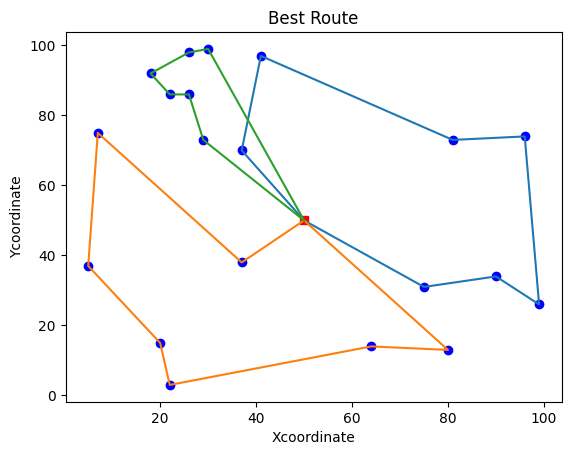

In [42]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)


    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 100, stats=stats, halloffame=hof)
    best_individual = hof[0]
    print("best individual fitness "  + str(np.mean(best_individual.fitness.values)))

    plot_routes(best_individual, title="Best Route")
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html

    return pop, stats, hof

if __name__ == "__main__":
    main()
    # TODO: Task 6 - Call the main function, run the algorithm and print the results

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.